In [1]:
! git clone https://github.com/Zanmadit/ai_hack_cast

Cloning into 'ai_hack_cast'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 46 (delta 13), reused 25 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (46/46), 6.67 MiB | 18.76 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [2]:
! ls ai_hack_cast/data

all_ai_models.csv	gpu_clusters.csv	   ml_hardware.csv
frontier_ai_models.csv	large_scale_ai_models.csv  notable_ai_models.csv


In [3]:
import pandas as pd
import os

base_path = "ai_hack_cast/data"

for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith(".csv"):
            file_path = os.path.join(root, file)
            print(f"\n{file_path}")
            try:
                df = pd.read_csv(file_path)
                print(df.columns.tolist())
            except Exception as e:
                print(f"Error{file_path}: {e}")


ai_hack_cast/data/all_ai_models.csv
['Model', 'Domain', 'Task', 'Organization', 'Authors', 'Publication date', 'Reference', 'Link', 'Citations', 'Notability criteria', 'Notability criteria notes', 'Parameters', 'Parameters notes', 'Training compute (FLOP)', 'Training compute notes', 'Training dataset size (gradients)', 'Dataset size notes', 'Training time (hours)', 'Training time notes', 'Training hardware', 'Approach', 'Confidence', 'Abstract', 'Epochs', 'WikiText and Penn Treebank data', 'Model accessibility', 'Country (of organization)', 'Base model', 'Finetune compute (FLOP)', 'Finetune compute notes', 'Hardware quantity', 'Hardware utilization (MFU)', 'Last modified', 'Training cloud compute vendor', 'Training data center', 'Archived links', 'Batch size', 'Batch size notes', 'Organization categorization', 'Foundation model', 'Training compute lower bound', 'Training compute upper bound', 'Training chip-hours', 'Training code accessibility', 'Accessibility notes', 'Possibly over 1

In [4]:
! ls plots

ls: cannot access 'plots': No such file or directory


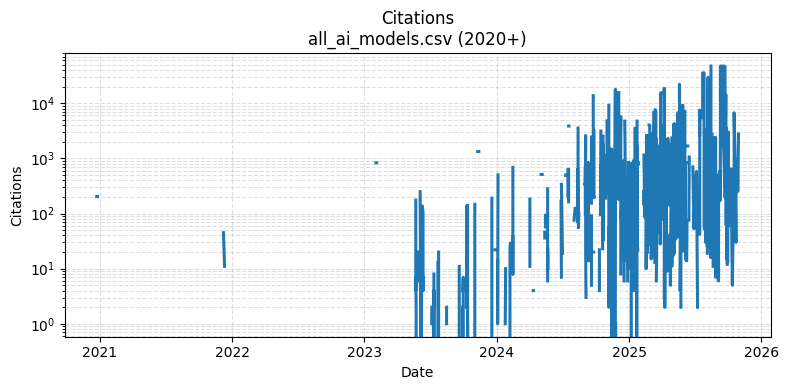

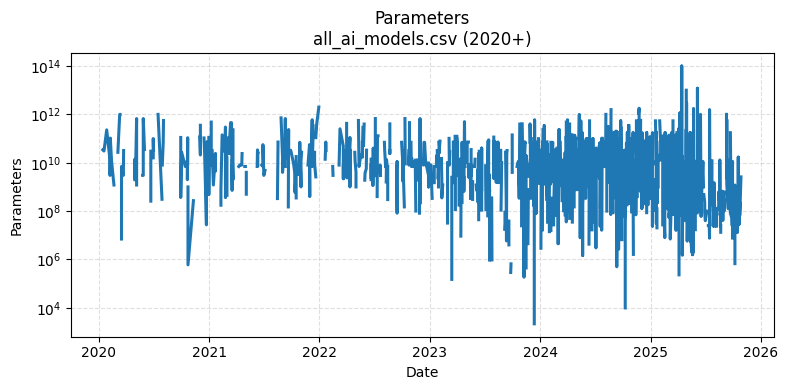

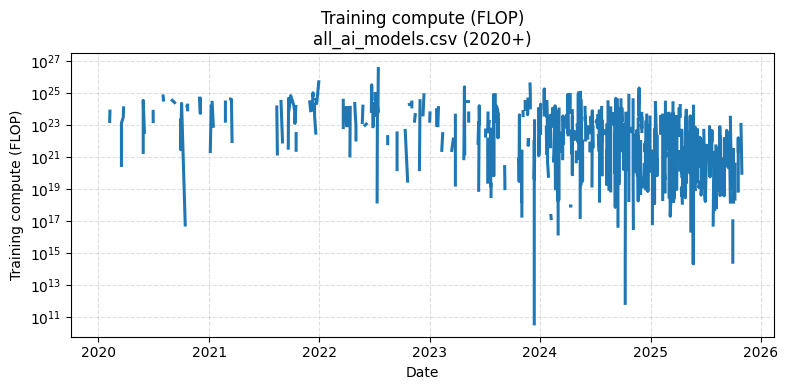

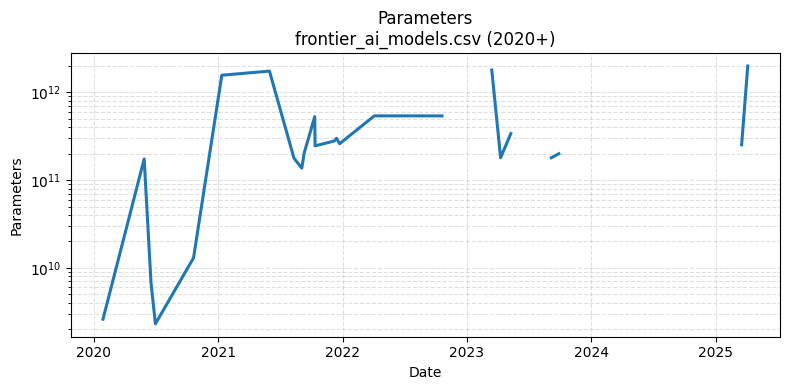

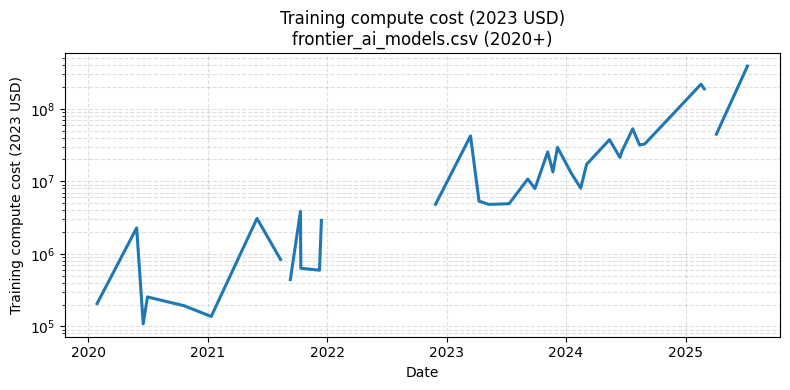

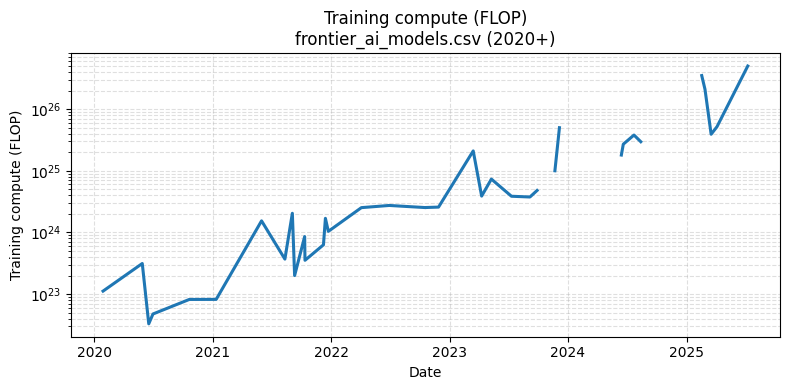

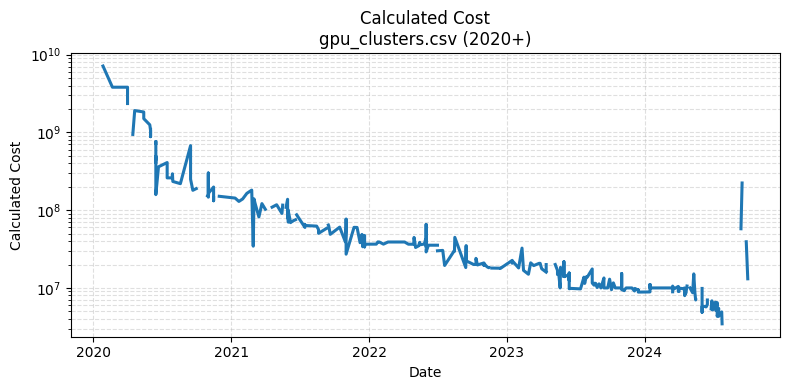

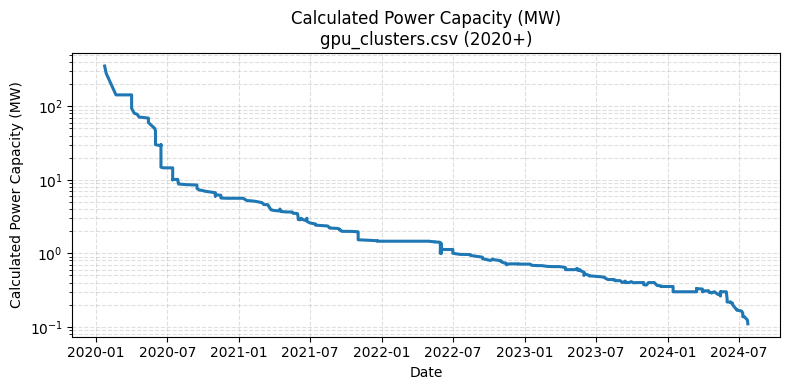

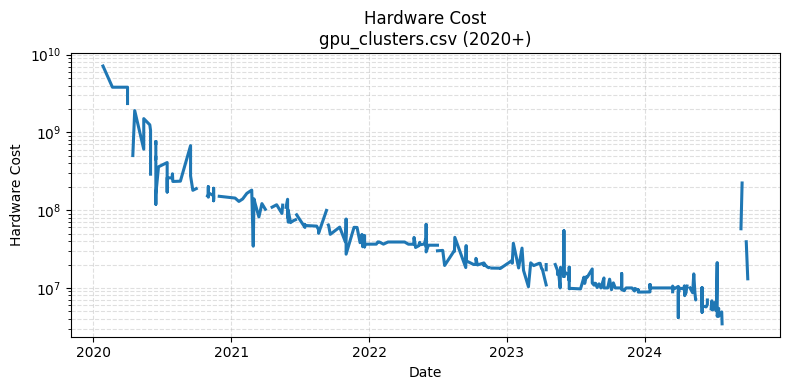

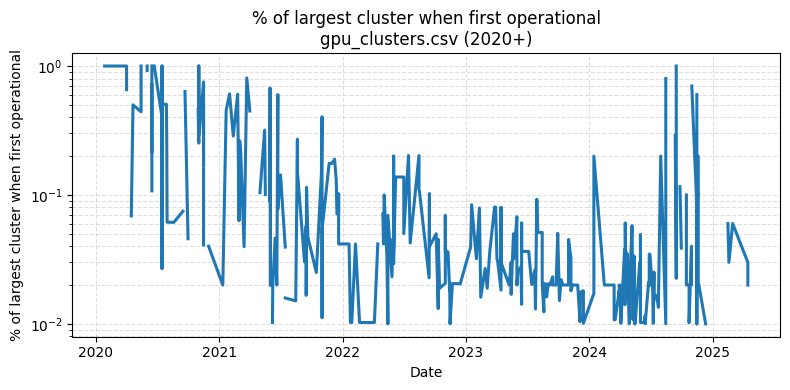

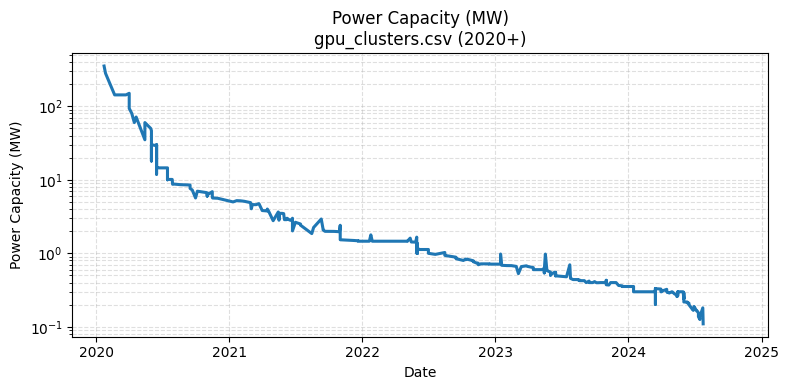

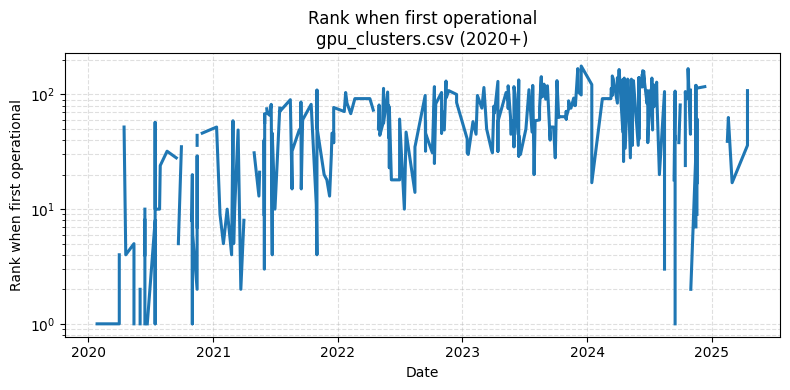

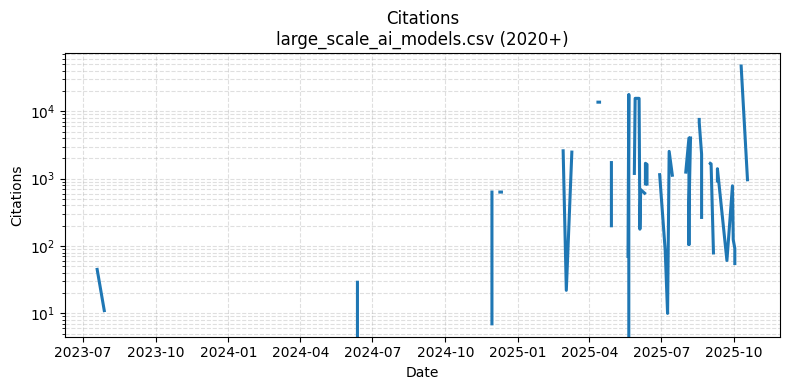

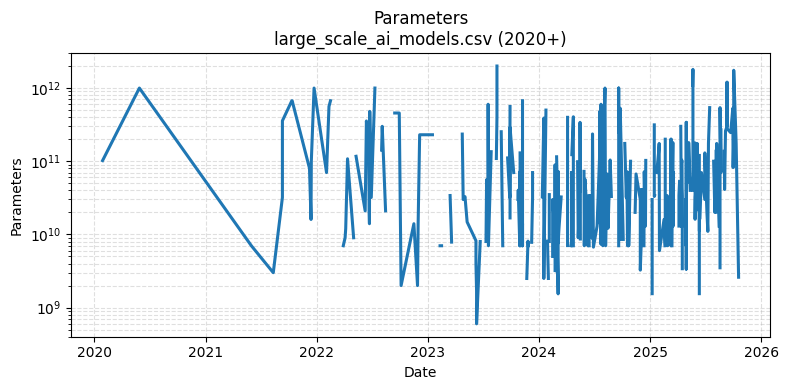

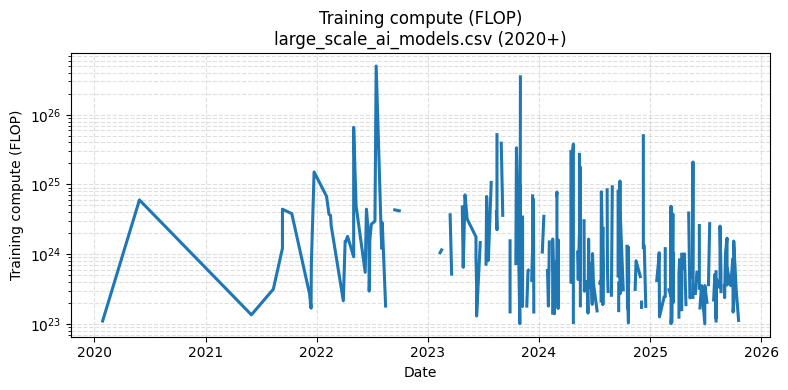

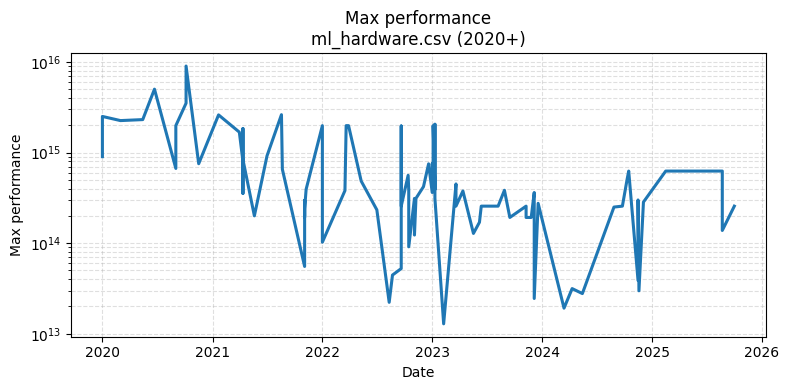

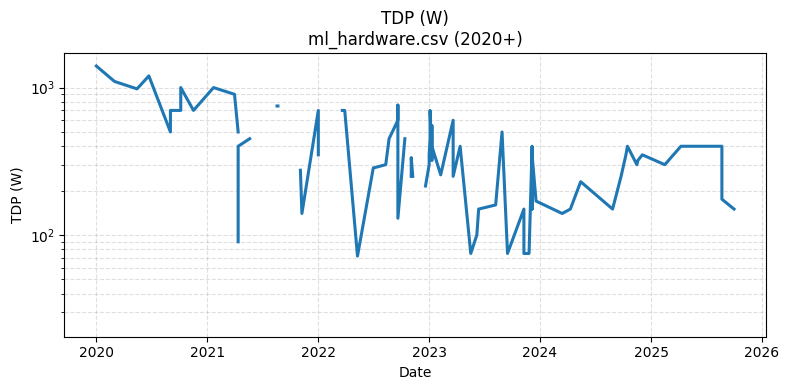

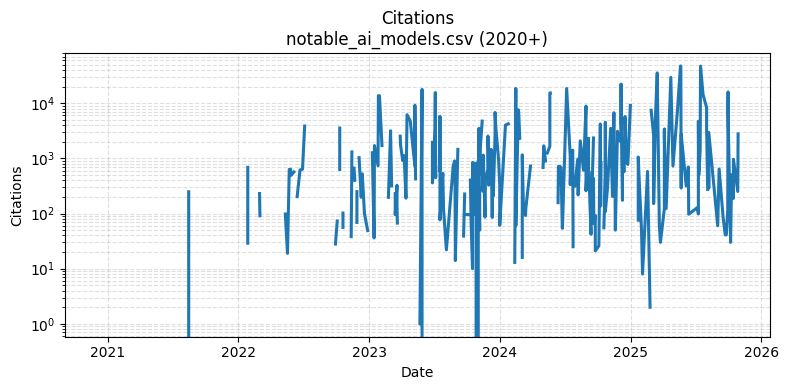

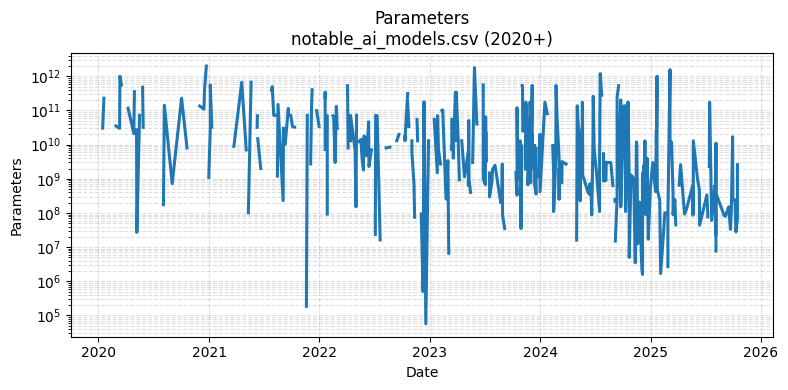

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

DATA_DIR = "ai_hack_cast/data"

plots = [
    ("all_ai_models.csv", "Citations"),
    ("all_ai_models.csv", "Parameters"),
    ("all_ai_models.csv", "Training compute (FLOP)"),
    ("frontier_ai_models.csv", "Parameters"),
    ("frontier_ai_models.csv", "Training compute cost (2023 USD)"),
    ("frontier_ai_models.csv", "Training compute (FLOP)"),
    ("gpu_clusters.csv", "Calculated Cost"),
    ("gpu_clusters.csv", "Calculated Power Capacity (MW)"),
    ("gpu_clusters.csv", "Hardware Cost"),
    ("gpu_clusters.csv", "% of largest cluster when first operational"),
    ("gpu_clusters.csv", "Power Capacity (MW)"),
    ("gpu_clusters.csv", "Rank when first operational"),
    ("large_scale_ai_models.csv", "Citations"),
    ("large_scale_ai_models.csv", "Parameters"),
    ("large_scale_ai_models.csv", "Training compute (FLOP)"),
    ("ml_hardware.csv", "Max performance"),
    ("ml_hardware.csv", "TDP (W)"),
    ("notable_ai_models.csv", "Citations"),
    ("notable_ai_models.csv", "Parameters"),
]

def try_parse_date(series):
    try:
        return pd.to_datetime(series, errors="coerce")
    except Exception:
        return None

def detect_date_column(df):
    for col in df.columns:
        if any(hint in col.lower() for hint in ["date", "year", "published"]):
            parsed = try_parse_date(df[col])
            if parsed is not None and parsed.notna().sum() > 10:
                return col, parsed
    return None, None

for file, col in plots:
    path = os.path.join(DATA_DIR, file)
    if not os.path.exists(path):
        print(f"{file} Not found")
        continue

    try:
        df = pd.read_csv(path)
    except Exception as e:
        print(f"Error {file}: {e}")
        continue

    date_col, parsed_date = detect_date_column(df)
    if not date_col:
        print(f"No date {file}")
        continue

    df[date_col] = parsed_date
    df = df[df[date_col].dt.year >= 2020]
    if len(df) < 3:
        print(f"Not enough date {file}")
        continue

    if col not in df.columns:
        match = [c for c in df.columns if re.sub(r"[\W_]+", "", c.lower()) == re.sub(r"[\W_]+", "", col.lower())]
        if match:
            col = match[0]
        else:
            print(f"Column {col} not found in {file}")
            continue

    numeric = pd.to_numeric(df[col].astype(str).str.replace(",", ""), errors="coerce")
    if numeric.notna().sum() < 3:
        print(f"Not enough numeric data {col} ({file})")
        continue

    df = df.sort_values(date_col)
    plt.figure(figsize=(8, 4))
    plt.plot(df[date_col], numeric, linewidth=2.2, color="tab:blue")
    plt.title(f"{col}\n{file} (2020+)", fontsize=12)
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.yscale("log")
    plt.grid(True, which="both", linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
[all_ai_models.csv] Citations | years 2010-2025 | samples 13 | RMSE(train)=0.3225, RMSE(test)=0.2140


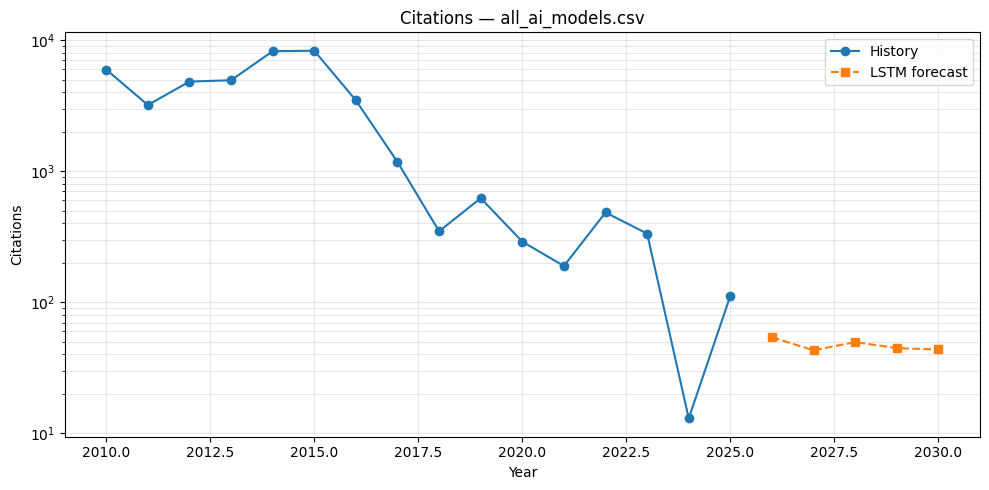

[ERROR] all_ai_models.csv::Citations — [Errno 2] No such file or directory: '/content/model/all_ai_models_Citations.keras'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
[all_ai_models.csv] Parameters | years 2010-2025 | samples 13 | RMSE(train)=0.1305, RMSE(test)=0.2042


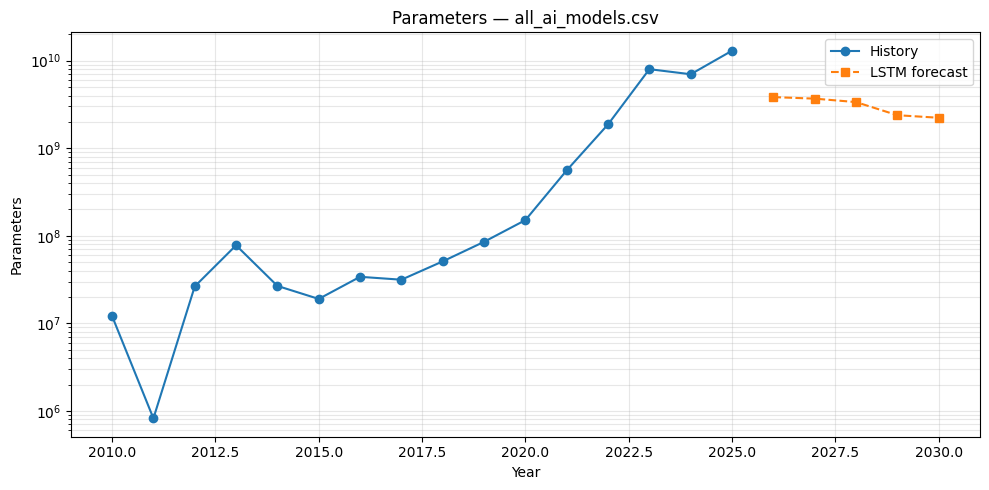

[ERROR] all_ai_models.csv::Parameters — [Errno 2] No such file or directory: '/content/model/all_ai_models_Parameters.keras'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
[all_ai_models.csv] Training compute (FLOP) | years 2010-2025 | samples 13 | RMSE(train)=0.1494, RMSE(test)=0.1934


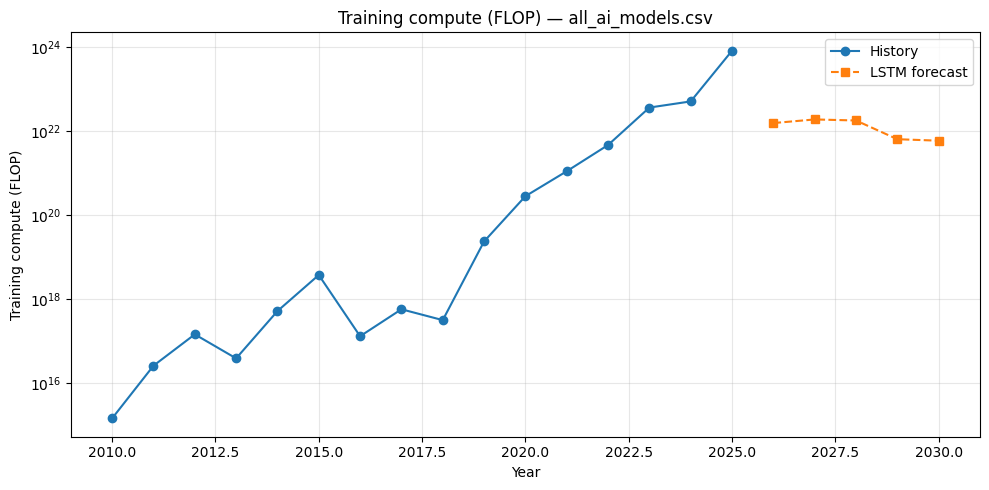

[ERROR] all_ai_models.csv::Training compute (FLOP) — [Errno 2] No such file or directory: '/content/model/all_ai_models_Training_compute_(FLOP).keras'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
[frontier_ai_models.csv] Parameters | years 2010-2025 | samples 13 | RMSE(train)=0.2469, RMSE(test)=0.0417


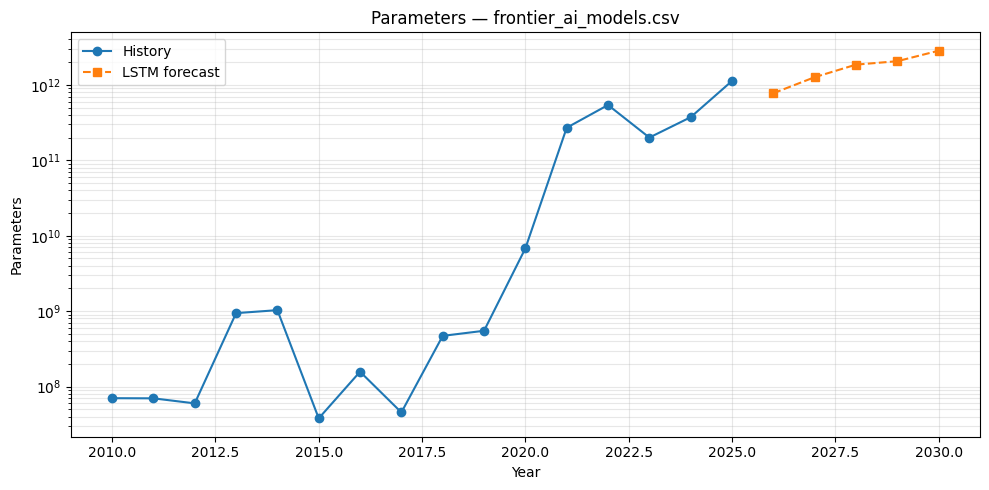

[ERROR] frontier_ai_models.csv::Parameters — [Errno 2] No such file or directory: '/content/model/frontier_ai_models_Parameters.keras'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
[frontier_ai_models.csv] Training compute cost (2023 USD) | years 2012-2025 | samples 11 | RMSE(train)=0.0619, RMSE(test)=0.0607


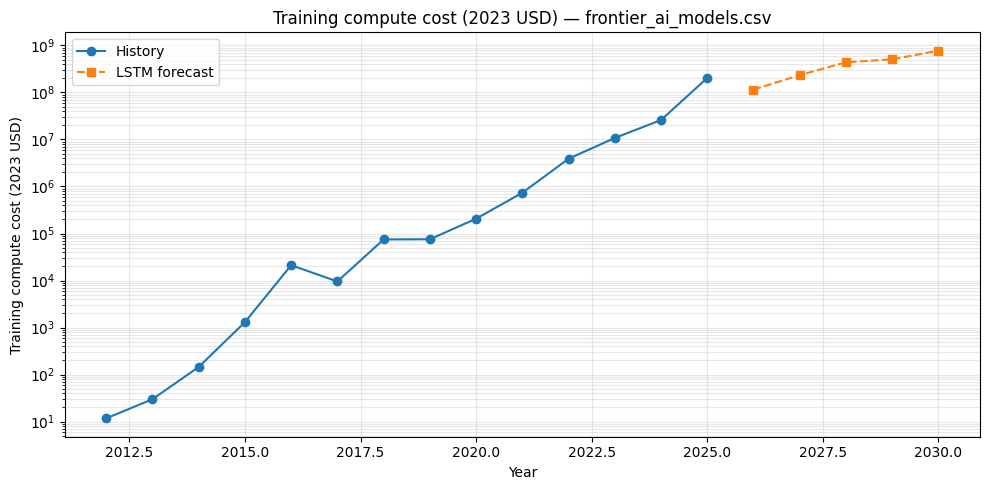

[ERROR] frontier_ai_models.csv::Training compute cost (2023 USD) — [Errno 2] No such file or directory: '/content/model/frontier_ai_models_Training_compute_cost_(2023_USD).keras'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
[frontier_ai_models.csv] Training compute (FLOP) | years 2010-2025 | samples 13 | RMSE(train)=0.1209, RMSE(test)=0.0961


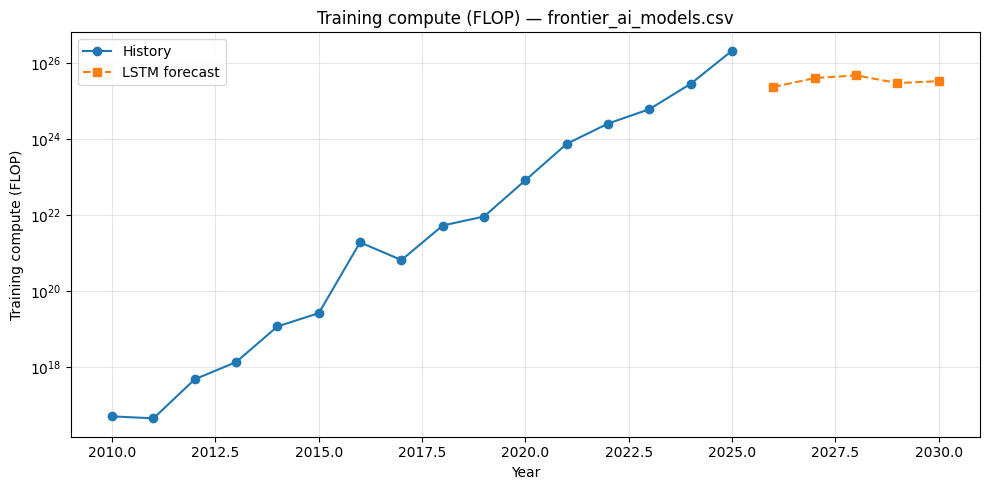

[ERROR] frontier_ai_models.csv::Training compute (FLOP) — [Errno 2] No such file or directory: '/content/model/frontier_ai_models_Training_compute_(FLOP).keras'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
[gpu_clusters.csv] Calculated Cost | years 2012-2025 | samples 10 | RMSE(train)=0.2020, RMSE(test)=0.4704


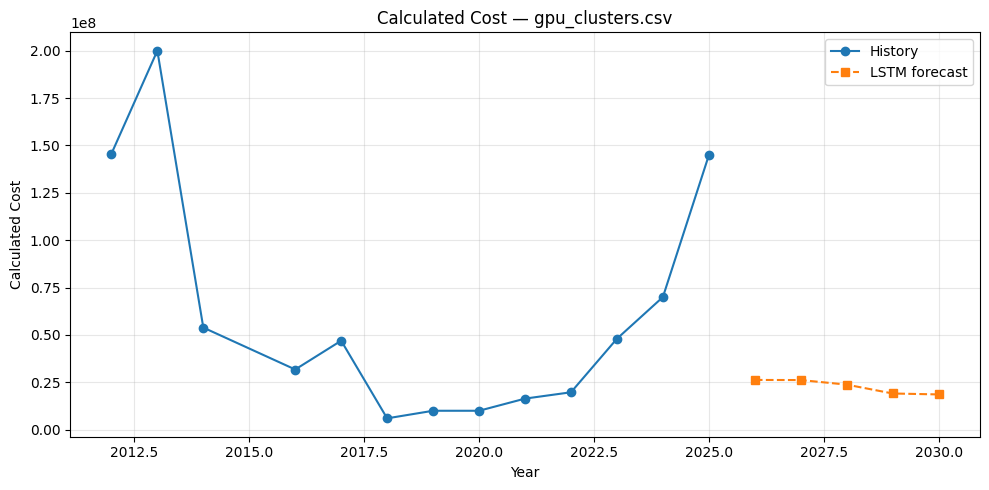

[ERROR] gpu_clusters.csv::Calculated Cost — [Errno 2] No such file or directory: '/content/model/gpu_clusters_Calculated_Cost.keras'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
[gpu_clusters.csv] Calculated Power Capacity (MW) | years 2010-2025 | samples 13 | RMSE(train)=0.2670, RMSE(test)=0.2036


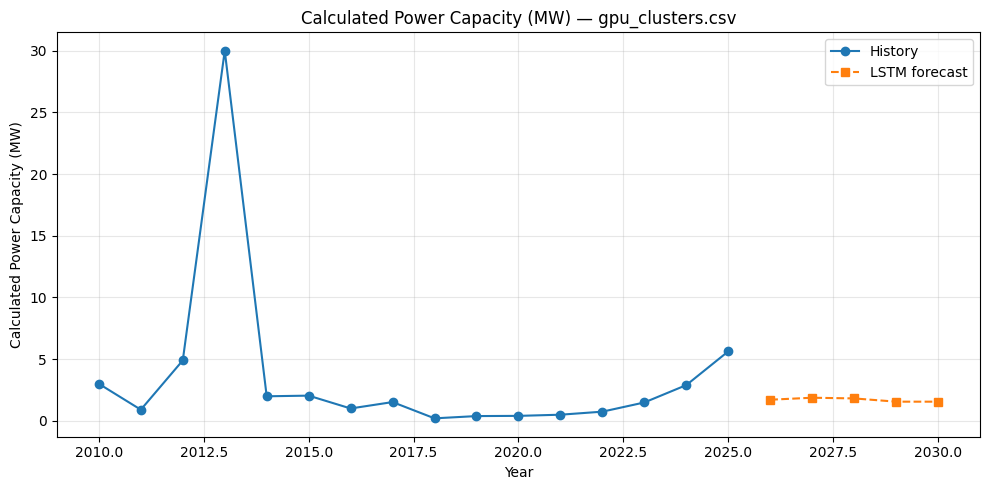

[ERROR] gpu_clusters.csv::Calculated Power Capacity (MW) — [Errno 2] No such file or directory: '/content/model/gpu_clusters_Calculated_Power_Capacity_(MW).keras'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
[gpu_clusters.csv] Hardware Cost | years 2012-2025 | samples 10 | RMSE(train)=0.2057, RMSE(test)=0.4618


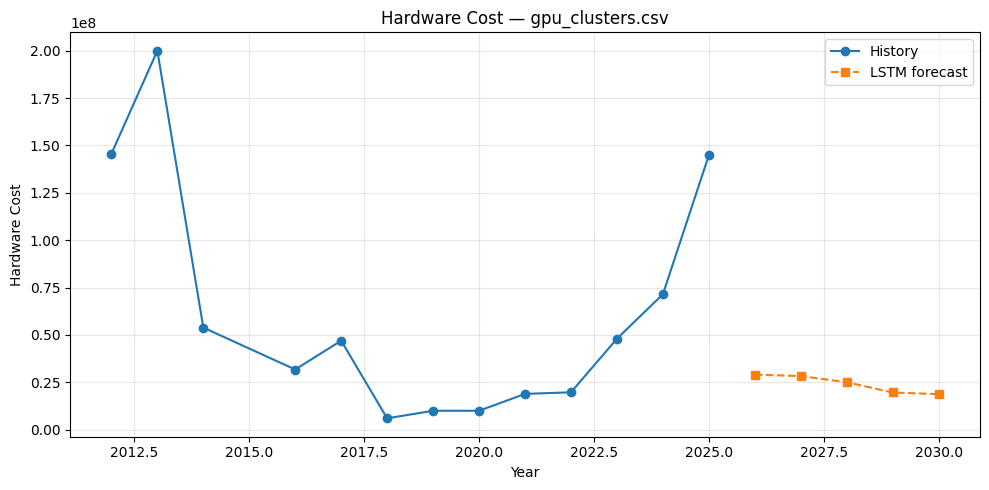

[ERROR] gpu_clusters.csv::Hardware Cost — [Errno 2] No such file or directory: '/content/model/gpu_clusters_Hardware_Cost.keras'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
[gpu_clusters.csv] % of largest cluster when first operational | years 2010-2025 | samples 12 | RMSE(train)=0.1156, RMSE(test)=0.0119


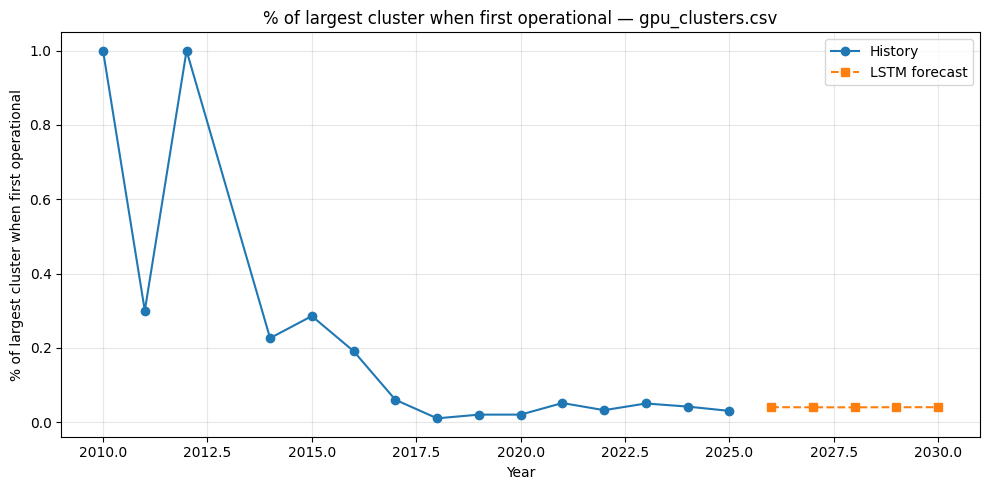

[ERROR] gpu_clusters.csv::% of largest cluster when first operational — [Errno 2] No such file or directory: '/content/model/gpu_clusters_%_of_largest_cluster_when_first_operational.keras'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
[gpu_clusters.csv] Power Capacity (MW) | years 2010-2025 | samples 13 | RMSE(train)=0.2298, RMSE(test)=0.2552


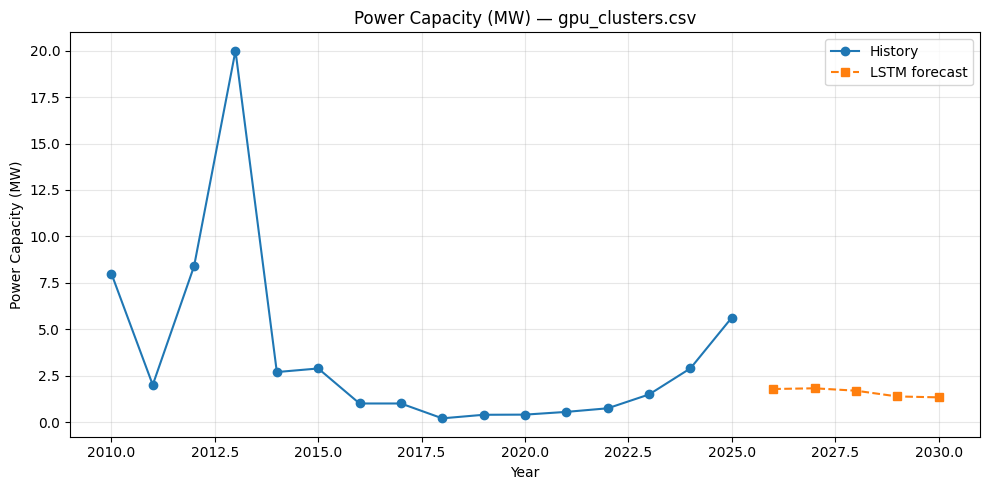

[ERROR] gpu_clusters.csv::Power Capacity (MW) — [Errno 2] No such file or directory: '/content/model/gpu_clusters_Power_Capacity_(MW).keras'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
[gpu_clusters.csv] Rank when first operational | years 2010-2025 | samples 12 | RMSE(train)=0.1988, RMSE(test)=0.0396


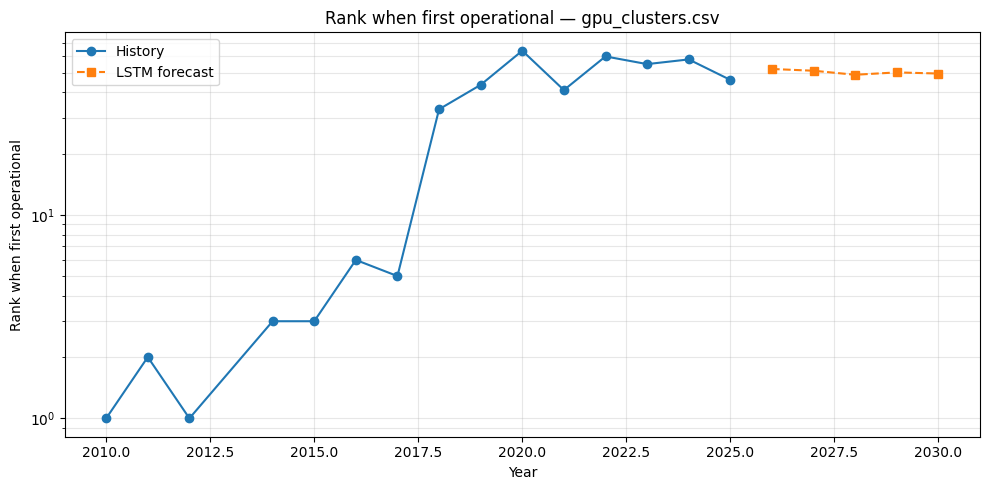

[ERROR] gpu_clusters.csv::Rank when first operational — [Errno 2] No such file or directory: '/content/model/gpu_clusters_Rank_when_first_operational.keras'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
[large_scale_ai_models.csv] Citations | years 2019-2025 | samples 4 | RMSE(train)=0.4870, RMSE(test)=0.0013


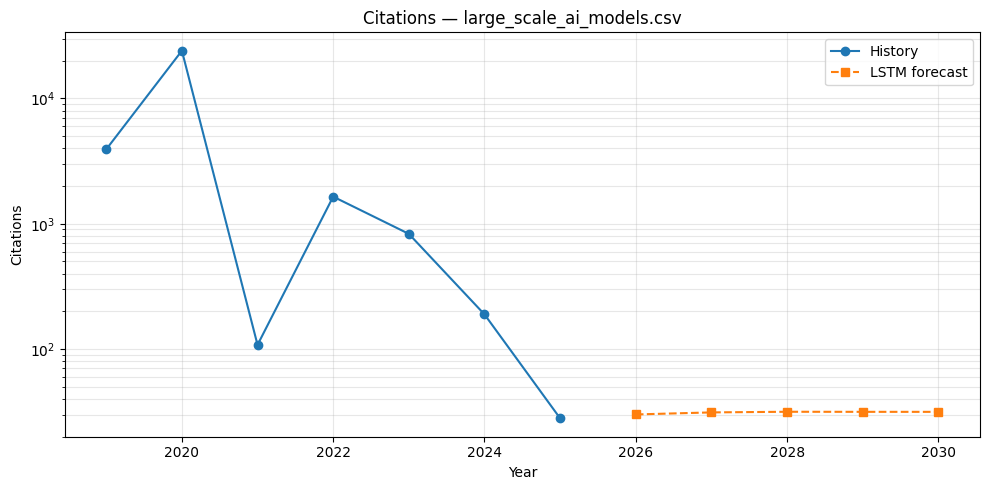

[ERROR] large_scale_ai_models.csv::Citations — [Errno 2] No such file or directory: '/content/model/large_scale_ai_models_Citations.keras'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
[large_scale_ai_models.csv] Parameters | years 2019-2025 | samples 4 | RMSE(train)=0.1554, RMSE(test)=0.0009


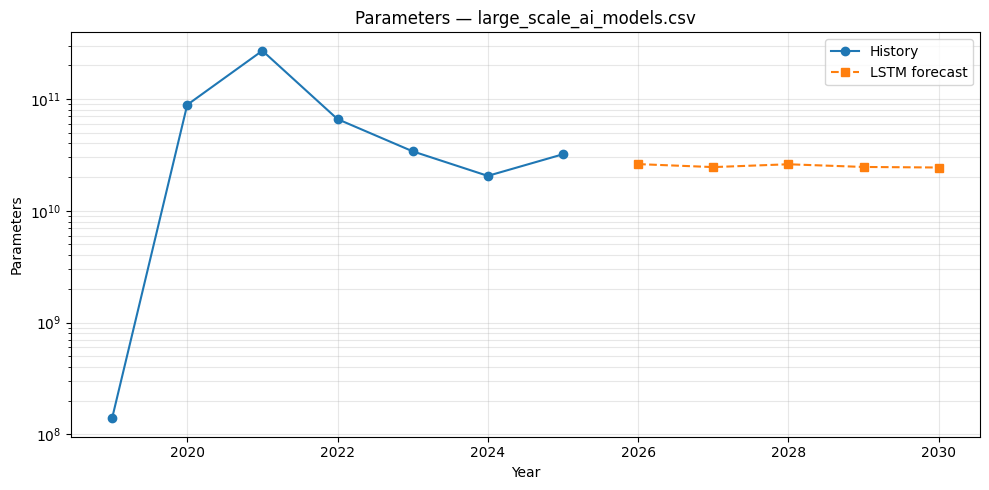

[ERROR] large_scale_ai_models.csv::Parameters — [Errno 2] No such file or directory: '/content/model/large_scale_ai_models_Parameters.keras'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
[large_scale_ai_models.csv] Training compute (FLOP) | years 2019-2025 | samples 4 | RMSE(train)=0.0369, RMSE(test)=0.3970


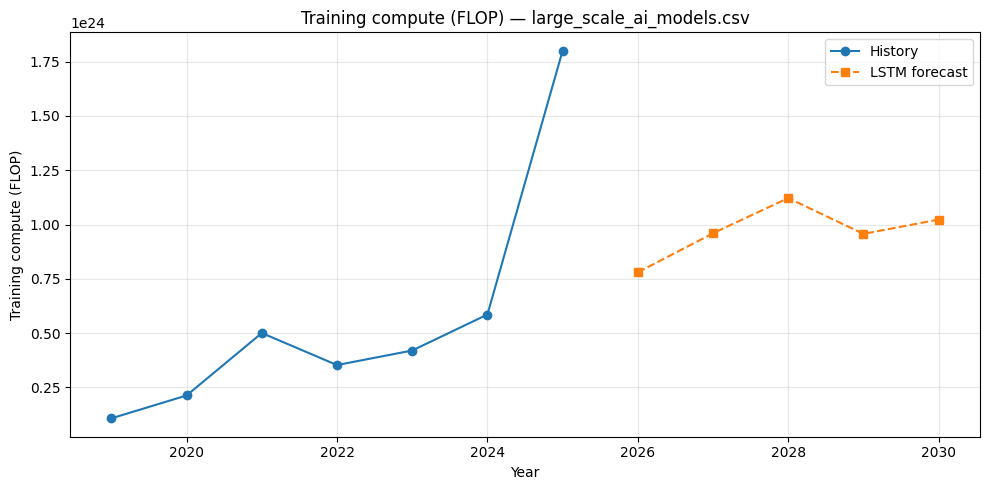

[ERROR] large_scale_ai_models.csv::Training compute (FLOP) — [Errno 2] No such file or directory: '/content/model/large_scale_ai_models_Training_compute_(FLOP).keras'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
[ml_hardware.csv] Max performance | years 2010-2025 | samples 13 | RMSE(train)=0.0981, RMSE(test)=0.0922


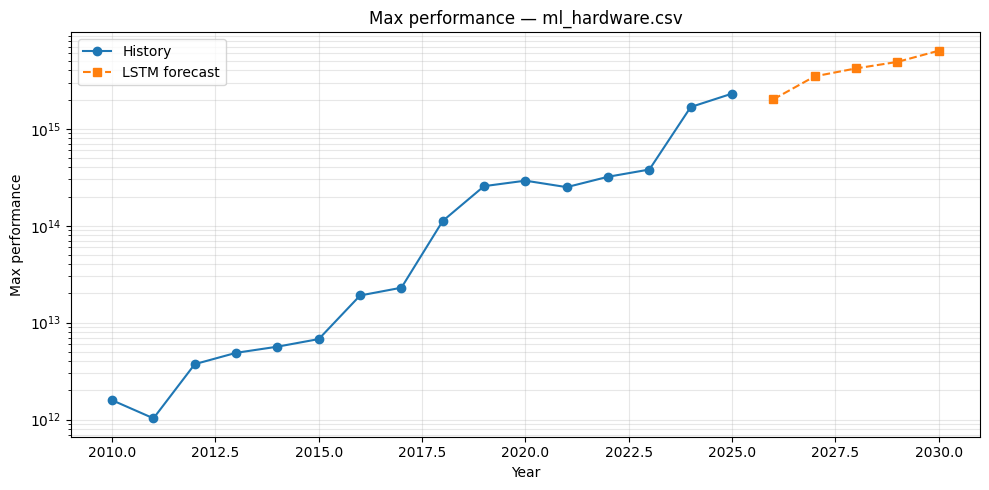

[ERROR] ml_hardware.csv::Max performance — [Errno 2] No such file or directory: '/content/model/ml_hardware_Max_performance.keras'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
[ml_hardware.csv] TDP (W) | years 2010-2025 | samples 13 | RMSE(train)=0.1180, RMSE(test)=0.4617


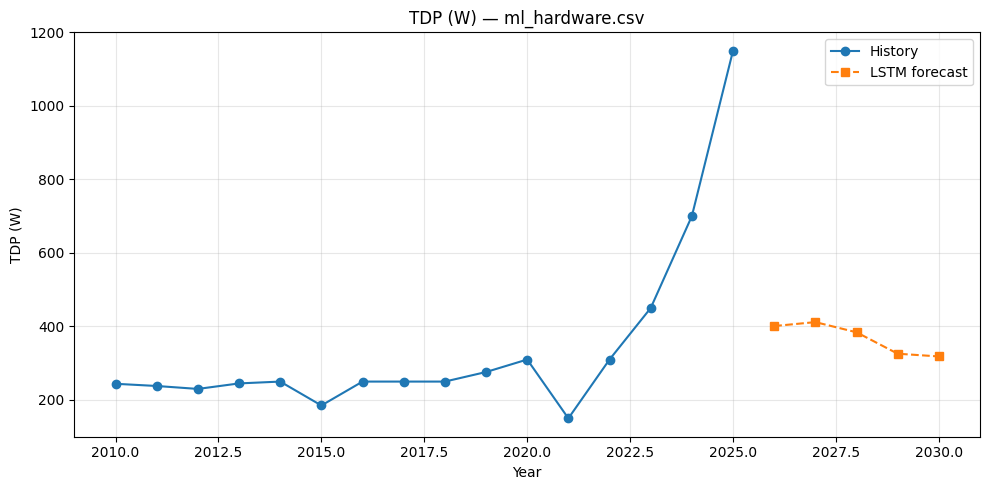

[ERROR] ml_hardware.csv::TDP (W) — [Errno 2] No such file or directory: '/content/model/ml_hardware_TDP_(W).keras'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
[notable_ai_models.csv] Citations | years 2010-2025 | samples 13 | RMSE(train)=0.4079, RMSE(test)=0.1128


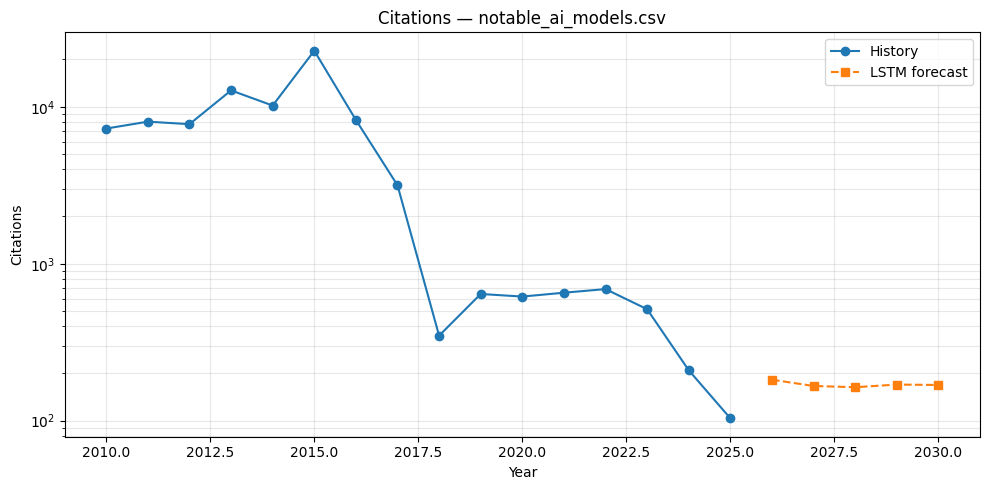

[ERROR] notable_ai_models.csv::Citations — [Errno 2] No such file or directory: '/content/model/notable_ai_models_Citations.keras'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
[notable_ai_models.csv] Parameters | years 2010-2025 | samples 13 | RMSE(train)=0.1191, RMSE(test)=0.2280


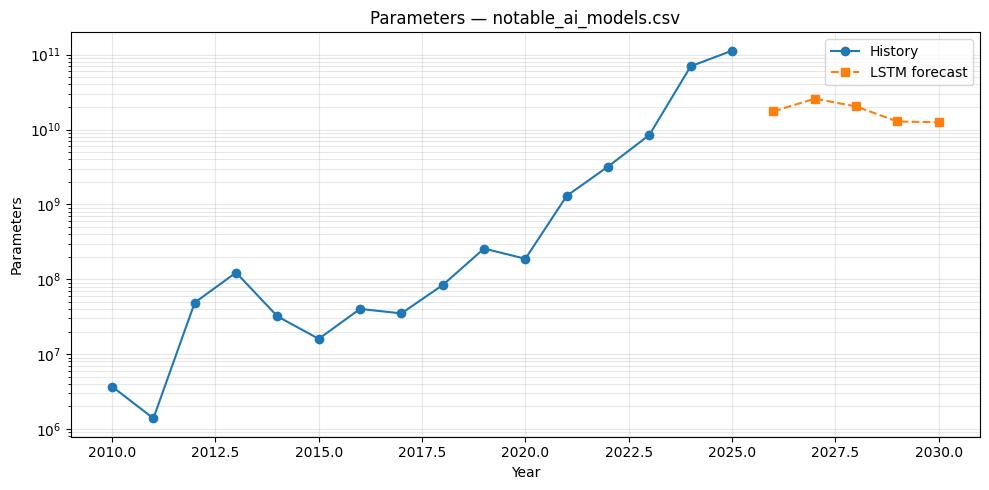

[ERROR] notable_ai_models.csv::Parameters — [Errno 2] No such file or directory: '/content/model/notable_ai_models_Parameters.keras'

 Models saved: /content/model


In [6]:
import os
import re
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import joblib

warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (9, 5)

DATA_DIR = "/content/ai_hack_cast/data"
MODEL_DIR = "/content/model"
FEATURES = [
    ("all_ai_models.csv", "Citations"),
    ("all_ai_models.csv", "Parameters"),
    ("all_ai_models.csv", "Training compute (FLOP)"),
    ("frontier_ai_models.csv", "Parameters"),
    ("frontier_ai_models.csv", "Training compute cost (2023 USD)"),
    ("frontier_ai_models.csv", "Training compute (FLOP)"),
    ("gpu_clusters.csv", "Calculated Cost"),
    ("gpu_clusters.csv", "Calculated Power Capacity (MW)"),
    ("gpu_clusters.csv", "Hardware Cost"),
    ("gpu_clusters.csv", "% of largest cluster when first operational"),
    ("gpu_clusters.csv", "Power Capacity (MW)"),
    ("gpu_clusters.csv", "Rank when first operational"),
    ("large_scale_ai_models.csv", "Citations"),
    ("large_scale_ai_models.csv", "Parameters"),
    ("large_scale_ai_models.csv", "Training compute (FLOP)"),
    ("ml_hardware.csv", "Max performance"),
    ("ml_hardware.csv", "TDP (W)"),
    ("notable_ai_models.csv", "Citations"),
    ("notable_ai_models.csv", "Parameters"),
]
MIN_YEAR = 2010
N_FUTURE = 5
EPOCHS = 200
BATCH_SIZE = 8
WINDOW = 3
SEED = 42

tf.random.set_seed(SEED)
np.random.seed(SEED)


def safe_column_match(df: pd.DataFrame, target: str):
    norm = lambda s: re.sub(r"[\W_]+", "", s.lower())
    tgt = norm(target)
    for c in df.columns:
        if norm(c) == tgt:
            return c
    for c in df.columns:
        if tgt in norm(c) or norm(c) in tgt:
            return c
    return None


def detect_date_column(df: pd.DataFrame):
    for c in df.columns:
        if any(k in c.lower() for k in ("date", "year", "published", "operational")):
            parsed = pd.to_datetime(df[c], errors="coerce")
            if parsed.notna().sum() > 5:
                return c
    if "year" in df.columns:
        return "year"
    return None


def aggregate_by_year(path: str, metric_col: str, date_col: str, min_year=MIN_YEAR):
    df = pd.read_csv(path, low_memory=False)
    metric_actual = safe_column_match(df, metric_col)
    if metric_actual is None:
        raise KeyError(f"Metric {metric_col} not found in {path}")
    if date_col == "year":
        df["year"] = pd.to_numeric(df["year"], errors="coerce").astype("Int64")
    else:
        df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
        df["year"] = df[date_col].dt.year
    df = df.dropna(subset=["year", metric_actual])
    df["year"] = df["year"].astype(int)
    df = df[df["year"] >= min_year]
    df["value"] = pd.to_numeric(df[metric_actual].astype(str).str.replace(",", ""), errors="coerce")
    df = df.dropna(subset=["value"])
    agg = df.groupby("year")["value"].median().reset_index().sort_values("year")
    return agg


def make_sequences(values: np.ndarray, window: int):
    X, y = [], []
    for i in range(len(values) - window):
        X.append(values[i:i + window])
        y.append(values[i + window])
    X = np.array(X)
    y = np.array(y)
    X = X.reshape((X.shape[0], X.shape[1], 1))
    return X, y


def build_lstm_model(input_shape, units=64, dropout=0.1):
    model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(units, input_shape=input_shape),
        tf.keras.layers.Dropout(dropout),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer="adam", loss="mse")
    return model


# LSTM runner
def run_lstm_for_pair(file: str, metric: str, n_future=N_FUTURE, window=WINDOW,
                      epochs=EPOCHS, batch_size=BATCH_SIZE, min_year=MIN_YEAR):
    path = os.path.join(DATA_DIR, file)
    if not os.path.exists(path):
        print(f"[SKIP] {file} not found")
        return

    try:
        df_raw = pd.read_csv(path, low_memory=False)
    except Exception as e:
        print(f"[SKIP] could not read {file}: {e}")
        return

    date_col = detect_date_column(df_raw)
    if date_col is None:
        print(f"[SKIP] no date col in {file}")
        return

    try:
        ts = aggregate_by_year(path, metric, date_col, min_year=min_year)
    except KeyError as e:
        print(f"[SKIP] {e}")
        return

    if ts.shape[0] < window + 2:
        print(f"[SKIP] insufficient data for LSTM in {file}::{metric}")
        return

    years = ts["year"].values
    values = ts["value"].values.astype(float)

    # Log-transform
    vals_log = np.log1p(values).reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(vals_log).ravel()

    X, y = make_sequences(scaled, window)
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    model = build_lstm_model(input_shape=(window, 1), units=32, dropout=0.1)
    es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=20,
                                          restore_best_weights=True, verbose=0)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[es],
        verbose=0
    )

    pred_train = model.predict(X_train).ravel()
    pred_test = model.predict(X_test).ravel()
    rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

    print(f"[{file}] {metric} | years {years[0]}-{years[-1]} | "
          f"samples {len(X)} | RMSE(train)={rmse_train:.4f}, RMSE(test)={rmse_test:.4f}")

    # future forecast
    sim_buffer = list(scaled[-window:])
    preds_scaled = []
    for step in range(n_future):
        x_in = np.array(sim_buffer[-window:]).reshape(1, window, 1)
        p = model.predict(x_in, verbose=0).ravel()[0]
        preds_scaled.append(p)
        sim_buffer.append(p)

    preds_log = scaler.inverse_transform(np.array(preds_scaled).reshape(-1, 1)).ravel()
    preds_vals = np.expm1(preds_log)
    future_years = np.arange(years[-1] + 1, years[-1] + 1 + n_future)

    # plot
    plt.figure(figsize=(10, 5))
    plt.plot(years, values, "o-", label="History")
    plt.plot(future_years, preds_vals, "s--", label="LSTM forecast")
    plt.title(f"{metric} — {file}")
    plt.xlabel("Year")
    plt.ylabel(metric)
    try:
        if (max(values.max(), preds_vals.max()) / max(values.min(), 1)) > 50:
            plt.yscale("log")
    except Exception:
        pass
    plt.grid(alpha=0.3, which="both")
    plt.legend()
    plt.tight_layout()
    plt.show()

    df_fc = pd.DataFrame({
        "year": future_years,
        "forecast": preds_vals
    })
    return df_fc, model, scaler



models = {}
scalers = {}
forecasts = {}

for file, metric in FEATURES:
    print("\n" + "=" * 80)
    try:
        fc, model, scaler = run_lstm_for_pair(file, metric)
        if model is not None:
            models[(file, metric)] = model
            scalers[(file, metric)] = scaler
            forecasts[(file, metric)] = fc

            # Save models
            base_name = f"{file.replace('.csv', '')}_{metric.replace(' ', '_')}"
            model.save(os.path.join(MODEL_DIR, f"{base_name}.keras"))
            joblib.dump(scaler, os.path.join(MODEL_DIR, f"{base_name}_scaler.pkl"))
    except Exception as e:
        print(f"[ERROR] {file}::{metric} — {e}")

print("\n Models saved:", MODEL_DIR)
